In [7]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import RXGate, CRXGate
from qiskit_aer.noise.passes.local_noise_pass import LocalNoisePass

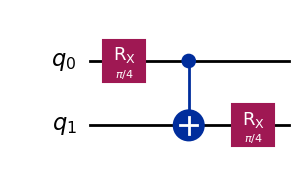

In [10]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import RXGate, CRXGate
from qiskit_aer.noise.passes.local_noise_pass import LocalNoisePass

# Parameters
phi = np.pi / 4
theta = np.pi / 4
gamma = 0.01

# Arbitrary circuit with one gate that we like to bind noise to
qc = QuantumCircuit(2)
qc.rx(phi, 0)
qc.cx(0, 1)
qc.rx(theta, 1)

# Define custom gate-specific (noise) instruction
def custom_crx_noise(instr, qubits):
    qc_noise = QuantumCircuit(len(qubits), name="custom_crx_noise")
    qc_noise.append(instr, qubits)
    custom_crx_noise = qc_noise.to_instruction()

    return custom_crx_noise

# We intend to bind/append our custom_crx_noise callable to the first-appearing RX gate (qubit 0)
local_noise_pass = LocalNoisePass(custom_crx_noise(CRXGate(gamma*phi), [0, 1]), [RXGate])


In [13]:
# Define custom gate-specific (noise) instruction
def custom_crx_noise(instr, qubits):
    qc_noise = QuantumCircuit(len(qubits), name="custom_crx_noise")
    qc_noise.append(instr, qubits)
    custom_crx_noise = qc_noise.to_instruction()

    return custom_crx_noise

# We intend to bind/append our custom_crx_noise callable to the first-appearing RX gate (qubit 0)
local_noise_pass = LocalNoisePass(custom_crx_noise(CRXGate(gamma*phi), [0, 1]), [RXGate])


In [15]:
local_noise_pass.run(qc)

AttributeError: 'QuantumCircuit' object has no attribute 'topological_op_nodes'